In [ ]:
import pandas as pd
import numpy as np
import nltk

In [2]:
n= pd.read_csv("Amazon_Mobile.csv")

In [3]:
n.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [4]:
product_name = []
for item in n["Product Name"]:
    if (item in product_name):
        continue
    else:
        product_name.append(item)

In [5]:
len(product_name)

4410

In [6]:
n["Brand Name"]
brands = []
for item in n["Brand Name"]:
    if (item in brands):
        continue
    else:
        brands.append(item)

In [7]:
len(brands)

385

In [8]:
from sklearn.utils import shuffle
#dropped rows having NaN values
n = n.dropna()

In [9]:
#description of data
n.describe()

,Price,Rating,Review Votes
count,334335.000000,334335.000000,334335.000000
mean,222.585019,3.824888,1.474515
std,283.139353,1.541203,9.217348
min,1.730000,1.000000,0.000000
25%,75.410000,3.000000,0.000000
50%,139.000000,5.000000,0.000000
75%,264.100000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [10]:
info = pd.pivot_table(n,index=['Brand Name'],values=['Rating', 'Review Votes'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
info = info.sort_values(by=('sum', 'Rating'), ascending = False)

info.head(10)

sum                   mean             
            Rating Review Votes    Rating Review Votes
Brand Name                                            
Samsung     250452        96057  3.973032     1.523795
BLU         226085        54798  3.821069     0.926143
Apple       220286       112211  3.926597     2.000160
LG           83266        22929  3.848493     1.059762
BlackBerry   61892        21114  3.750121     1.279326
Nokia        61833        25684  3.824879     1.588767
Motorola     49564        23107  3.811736     1.777051
HTC          42873        12777  3.474030     1.035329
CNPGD        38233        20151  3.107869     1.638026
OtterBox     34556         2268  4.385279     0.287817

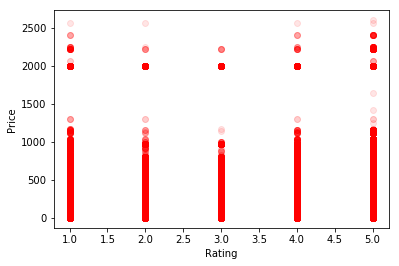

In [11]:
import matplotlib.pyplot as plt
ylabel = n["Price"]
plt.ylabel("Price")
plt.xlabel("Rating")
xlabel = n["Rating"]
plt.scatter(xlabel, ylabel,color='red',alpha=0.1)
plt.show()

In [12]:
reviews = n["Reviews"]
reviews.head()

0    I feel so LUCKY to have found this used (phone...
1    nice phone, nice up grade from my pantach revu...
2                                         Very pleased
3    It works good but it goes slow sometimes but i...
4    Great phone to replace my lost phone. The only...
Name: Reviews, dtype: object

In [13]:
reviews=n['Reviews']
sent_values=[]
sentiments=[]

In [14]:
import re
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer();

In [15]:
def removeNER(Reviews):
    preprocess_list = list()
    words = Reviews.lower().split()
    for w in words:
        preprocess_list.append( stemmer.stem(w) )
    return preprocess_list

In [16]:
def preprocess_Reviews(Reviews):
    preprocess_list = list()
    for text in Reviews:
        letters_only = re.sub("[^a-zA-Z]", " ", text) 
        letters_only = re.sub("XX","",letters_only)
        words = letters_only.lower().split()                             
        stops = set(stopwords.words("english"))                  
        meaningful_words = [w for w in words if not w in stops]
        preprocess_list.append(" ".join( meaningful_words ))
    return preprocess_list 

In [ ]:
n['newReviews'] = preprocess_Reviews(n.Reviews)
n['newReviews'] = n['newReviews']

In [144]:
def remove_stopwords(reviews, n):
    stops = set(stopwords.words("english"))
    #review_text = re.sub("[^a-zA-Z]"," ", review[n])
    words = reviews[n].lower().split()
    words = [''.join(c for c in s if c not in string.punctuation) for s in words]
    words = [s for s in words if s]
    reviews[n] = words

In [145]:
def preprocess_reviews(reviews):
    preprocess_list = list()
    for text in reviews:
        letters_only = re.sub("[^a-zA-Z]", " ", text) 
        letters_only = re.sub("XX","",letters_only)
        words = letters_only.lower().split()                             
        stops = set(stopwords.words("english"))                  
        meaningful_words = [w for w in words if not w in stops]
        preprocess_list.append(" ".join( meaningful_words ))
    return preprocess_list 

In [ ]:
from nltk.corpus import stopwords
def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]

In [147]:
reviews.head(1)

0    I feel so LUCKY to have found this used (phone...
Name: Reviews, dtype: object

In [135]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

In [99]:
sample1 = n['Reviews'][99314]
print(sample1)
print('Sentiment: ')
print(sentiment_value(sample1))

Good phone for the price.The speaker for listening to music audibly a little weak, otherwise no complaints.
Sentiment: 
-0.5


In [100]:
sample2 = n['Reviews'][9001]
print(sample2)
print('Sentiment: ')
print(sentiment_value(sample2))

I took this phone to two different Verizon stores, and they were unable to activate it. I am very grateful for Amazon's return policy, when I took action to return it a shipping label (i.e., free return shipping) was provided to me and once the phone was returned, I received a refund for the cost of the phone as well as the shipping costs.Because I was still phone-less when this phone would not activate, I went to a phone repair shop and picked up a similar phone for a similar price. If you have lost or broken your phone and need a replacement, I recommend you check out the local phone repair shops first - they may have a temporary solution until you are eligible for an upgrade.
Sentiment: 
0.8


In [91]:
for i in range(0,20000):
    sent_values.append(sentiment_value(reviews[i]))

In [92]:
#Sentiment Analysis on first 20,000 rows
temp_n = n[0:20000]

In [93]:
temp_n.shape

(20000, 6)

In [ ]:
#Intervals
[ -1, -0.5] : 1, V.Negative
[-0.5, 0] : 2, Negative
[0] : 3, Neutral
[0, 0.5] : 4, Positive
[0.5, 1] : 5, V.Positive

In [95]:
Sentiment_Value = []
Sentiment = []
for i in range(0,20000):
    sent = sent_values[i]
    if (sent<=1 and sent>=0.5):
        Sentiment.append('V.Positive')
        Sentiment_Value.append(5)
    elif (sent<0.5 and sent>0):
        Sentiment.append('Positive')
        Sentiment_Value.append(4)
    elif (sent==0):
        Sentiment.append('Neutral')
        Sentiment_Value.append(3)
    elif (sent<0 and sent>=-0.5):
        Sentiment.append('Negative')
        Sentiment_Value.append(2)
    else:
        Sentiment.append('V.Negative')
        Sentiment_Value.append(1)
        

In [106]:
temp_n['Sentiment_Value'] = Sentiment_Value
temp_n['Sentiment'] = Sentiment

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [108]:
temp_n.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment_Value,Sentiment
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,5,V.Positive
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,5,V.Positive
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,5,V.Positive
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,5,V.Positive
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,4,Positive
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0,1,V.Negative
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0,2,Negative
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0,4,Positive
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0,5,V.Positive
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0,5,V.Positive
